# SC12x

## 데이터 탐색 및 가설 검정

이번 SC 에서 여러분은 가상의 마케팅 데이터를 활용한 통계 분석을 진행하시게 됩니다. 

## 데이터셋 정보 :   
이 데이터셋은 알뜰 구매를 도와주는 XYZ사의 마케팅 정보를 다룹니다. 개인 정보는 보호를 위해 제거 되어 있습니다.

**Attribute Information:**
> 2,240 customers of XYZ company:

- ID - 고객의 고유값
- Year_Birth - 고객의 출생연도
- Education - 고객의 최종학력
- Marital_Status - 고객의 혼인여부
- Income - 고객의 연간 수입
- Kidhome - 자녀가 미취학아동인지 여부 (1 - yes, 0 - no)
- Teenhome - 자녀가 10대 청소년인지 여부 (1 - yes, 0 - no)
- Dt_Customer - 서비스 가입 시기
- Recency - 마지막 구매 시기 (일)
- MntWines - 최근 2년간 구매한 와인 구매 총액
- MntFruits- 최근 2년간 구매한 과일 구매 총액
- MntMeatProducts - 최근 2년간 구매한 정육 구매 총액
- MntFishProducts - 최근 2년간 구매한 어류 구매 총액
- MntSweetProducts - 최근 2년간 구매한 과자 구매 총액
- MntGoldProds - 최근 2년간 구매한 황금 구매 총액
- NumDealsPurchases - 할인을 통해 제품을 구매한 횟수
- NumWebPurchases - 회사의 웹사이트를 통해 구매한 횟수
- NumStorePurchases - 가게에서 직접 구매한 횟수
- NumWebVisitsMonth - 회사의 웹사이트를 방문한 횟수
- Complain - 고객의 최근 2년간 회사에 대한 클레임 여부 (1 - yes, 0 - no)
- Country - 고객의 국적

## Part 1 - 데이터 불러오기

### 1) 데이터셋을 업로드합니다

In [208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
import pandas as pd
filename = '/content/drive/MyDrive/Colab Notebooks/sc12x_dataset.csv'
df = pd.read_csv(filename, encoding='euc-kr')
print(df.shape)
df = df.set_index('Unnamed: 0', drop=True)

(2240, 22)


### 2) 결측치가 있는지 확인한 후 있다면 제거하세요

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna(axis=0)
df.isnull().sum()

In [ ]:
df.info()

### 3) 아래의 특성들을 만드세요

1. **TotalMntProducts** - 최근 2년간 구매한 모든 제품 가격들을 합한 값을 가진 계산한 특성입니다

2. **TotalNumPurchases** - 구매횟수를 모두 합친 값을 가진 특성입니다

3. **DaysSinceJoined** - 오늘 날짜를 기준으로 가입한 기간을 보여주는 특성입니다 

4. **VIP** - 누적 구매 금액이 $2,000 이상을 넘고, 오늘을 기준으로 가입기간이 5년 이상이 된다면 1, 아니면 0의 값을 가진 칼럼을 만듭니다

In [214]:
df['TotalMntProducts'] = df['MntWines']+df['MntGoldProds']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']
df['TotalNumPurchases'] = df['NumDealsPurchases']+df['NumStorePurchases']+df['NumWebPurchases']

In [215]:
from datetime import datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['DaysSinceJoined'] = (pd.to_datetime(datetime.now()) - df['Dt_Customer']).dt.days

In [216]:
df.loc[((df['TotalMntProducts'] >= 2000) & (df['DaysSinceJoined'] >= 1825)), 'VIP'] = 1
df.loc[~((df['TotalMntProducts'] >= 2000) & (df['DaysSinceJoined'] >= 1825)), 'VIP'] = 0
#df['VIP'].value_counts()

## Part 2 - 가설 검정

### Hypothesis Test    
   - 수치형 (numerical/continuous) 칼럼이 어떤 차이를 보이는지 t-test를 통해 가설을 세우고 검증하세요. (최소 2개)
   - 범주형 (categorical) 칼럼이 어떤 차이를 보이는지 $\chi^2-test$를 통해 가설을 세우고 검증하세요. (최소 2개)  
  **Hint:** categorical feature 간의 "cross tab"을 생성하여 탐색해 보세요 (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)). 그리고 $\chi^2 test$를 적용해 보세요. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)을 사용하면 contingency table 을 생성할 수 있습니다. 그리고 [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)를 사용하면 $\chi^2$ statistics 를 계산할 수 있습니다.    

In [217]:
from scipy import stats

In [ ]:
df.head()

In [ ]:
# t-test 1

'''
귀무가설 : 2년간 와인 구매 총액과 2년간 육류 구매 총액의 평균은 통계적으로 유의미한 차이가 없다.
대립가설 : 2년간 와인 구매 총액과 2년간 육류 구매 총액의 평균은 통계적으로 유의미한 차이가 있다.

결과 : p-value가 0.05보다 작기에 귀무가설 기각하고 대립가설을 채택한다. 총 구매 액수와 횟수의 평균은 통계적으로 유의미하게 차이가 있다. 
'''

print(df['MntWines'].mean())
print(df['MntMeatProducts'].mean())
stats.ttest_ind(df['MntWines'],df['MntMeatProducts'])

In [ ]:
# t-test 2

'''   다시 작성
귀무가설 : 웹을 통해 제품을 구매한 횟수와 할인을 통해 제품을 구매한 횟수의 평균은 통계적으로 유의미하게 차이가 없다.
대립가설 : 웹을 통해 제품을 구매한 횟수와 할인을 통해 제품을 구매한 횟수의 평균은 통계적으로 유의미하게 차이가 있다.

결과 : p-value가 0.05보다 작기에 귀무가설 기각하고 대립가설을 채택한다. 웹을 통해 제품을 구매한 횟수와 할인을 통해 제품을 구매한 횟수의 평균은 통계적으로 유의미하게 차이가 있다.
'''

print(df['NumDealsPurchases'].mean())
print(df['NumWebPurchases'].mean())
stats.ttest_ind(df['NumDealsPurchases'],df['NumWebPurchases'])

In [ ]:
# chi-sqaure test 1
from scipy.stats import chi2_contingency
'''
귀무가설 : 고객의 결혼 여부와 교육 수준 차이는 서로 연관이 없을 것이다.
대립가설 : 고객의 결혼 여부와 교육 수준 차이는 서로 연관이 있을 것이다.

chi-square test를 통해 p-value가 0.53나왔음으로 귀무가설을 기각하지 못한다.
따라서 귀무가설을 채택하며, 고객의 결혼 여부와 교육 수준 차이는 서로 연관이 없다고 할 수 있다.
'''
marital_edu = pd.crosstab(df['Marital_Status'],df['Education'])
stat, p, dof, expected = chi2_contingency(marital_edu)
print(stat, p, dof)

In [ ]:
# chi-sqaure test 2
'''
귀무가설 : 고객의 국적과 결혼 여부의 차이는 서로 연관이 없을 것이다.
대립가설 : 고객의 국적과 결혼 여부의 차이는 서로 연관이 있을 것이다.

chi-square test를 통해 p-value가 0.05보다 매우 작기에 귀무가설을 기각하고 대립가설을 채택한다.
고객의 국적과 결혼 여부 차이는 서로 연관이 있다고 할 수 있다.
'''
marital_counrty = pd.crosstab(df['Marital_Status'],df['Country'])
stat, p, dof, expected = chi2_contingency(marital_counrty)
print(stat, p, dof)

## Part 3 - Analysis and Interpretation

자, 위 파트들에서 우리는 데이터들을 잘 관찰했습니다. 다음의 질문들에 텍스트로 답변하십시오.  

1) 여러분들이 수행한 두 개 이상의 t-test 들을 해석하고 설명해 보세요.
2) 여러분들이 수행한 두 개 이상의 $\chi^2$ test 들을 해석하고 설명해 보세요.

# Answer

## T-Test
### 1. 2년간 육류 구매 총액과 와인 총액
> t-test를 통해 p-value가 0.05보다 작게 나와 두 집단의 평균은 유의미한 차이가 있다는 것을 알 수 있습니다.
>
> 또한 평균을 비교했을 때, 육류의 구매 총액이 유의미하게 더 크다는 것을 알 수 있습니다.

### 2. 웹을 통한 구매와 할인을 통해 제품을 구매한 횟수
> t-test를 통해 p-value가 0.05보다 작게 나와 두 집단의 평균은 유의미한 차이가 있다는 것을 알 수 있습니다.
>
> 평균을 비교했을 때, 웹 구매 횟수가 더 많을 것을 알 수 있습니다.


## Chi-sqaure test
### 1. 고객의 결혼 여부와 교육 수준 차이
> chi-square test를 통해 p-value가 0.53나왔음으로 귀무가설을 기각하지 못한다. 
>
> 두 집단은 독립이다. 두 집단은 연관성이 없다. 

### 2. 고객의 국적과 결혼 여부의 차이
> chi-square test를 통해 p-value가 0.05보다 매우 작기에 귀무가설을 기각하고 대립가설을 채택한다. 
> 
> 두 집단은 독립이 아니다. 두 집단은 연관성이 없다고 할 수 없다. 고객의 국적과 결혼 여부 사이에 상관 관계가 있을 것이다.

 


# Advanced Goals: 
> SC 에서 3점을 얻고 싶으시다면 아래의 문제를 모두 풀어주세요. 다만 2점을 얻었다면 충분합니다. 시간과 여유가 있는 분들만 도전해 보시기 바랍니다. 

## Part 1: 

여러분들의 dataframe column들이 적절한 data type을 가지도록 작업해 보세요.   
**Hint:** 특정 column datatype 이 float 이나 integer 로 되어있음에도 불구하고 "object" 라고 되어 있는 경우가 있습니다. 이 경우, `pd.to_numeric()`, `pd.to_datetime()` 과 같은 방법으로 칼럼들을 변환해 보세요. 
주석을 통해 읽는 이가 쉽게 읽을 수 있고, 전체 내용을 쉽게 따라갈 수 있다면 3점을 얻을 수 있습니다. 

## Part 2:

데이터 셋의 적절한 column들의 조합으로 $t-test$와 $\chi^2 test$가 쉽게 수행될 수 있도록 함수를 작성해 보세요.
**데이터 타입에 알맞은 가설검정이 실행되야 하는 것을 잊지 마세요**

## Part 3: 
평균 추정치에 대한 신뢰 구간(confidence interval)을 계산하고 결과를 작성하세요 (최소 두 개 선택). 계산한 추정치가 얼마나 정확한지 시각적으로 확인할 수 있도록 matplotlib, seaborn 등의 시각화 라이브러리를 활용해서 나타내세요

In [225]:
### Part 1

In [ ]:
df.dtypes
# Income은 numeric이여야 함.

In [227]:
# income (object -> numeric)
def tofloat(x):
  x = x.replace('$','').replace(',','')
  return pd.to_numeric(x)

df[' Income '] = df[' Income '].apply(toint)
df[' Income '].dtypes

dtype('float64')

In [228]:
# 날짜 개념이므로 날짜 type으로
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'])
df['Year_Birth'].dtypes

dtype('<M8[ns]')

In [ ]:
#df['Year_Birth'] = df['Year_Birth'].dt.year
df.head()

In [206]:
### Part 2

In [276]:
### t-test, chi_sqaure p-value 출력 함수
def t_chi_test(df1, df2):
  import numpy as np
  from scipy.stats import chi2_contingency
  from scipy import stats
  
  if (np.issubdtype(df1.dtypes, np.number)) & (np.issubdtype(df2.dtypes, np.number)): 
    print(stats.ttest_ind(df1,df2))
  else :
    df_crosstab = pd.crosstab(df1,df2)
    print(chi2_contingency(df_crosstab))
  return 

In [ ]:
### 이곳에 Part 3 답안을 작성해주시기 바랍니다

In [327]:
from scipy.stats import t

def t_inerval(df):
# 표본의 크기
  n = len(df)
# 자유도
  dof = n-1
# 평균의 평균
  mean = np.mean(df)
# 표본의 표준편차
  sample_std = np.std(df, ddof = 1)
# 표준 오차
  std_err = sample_std / n ** 0.5 # sample_std / sqrt(n)

  CI = t.interval(.95, dof, loc = mean, scale = std_err) 
  return print("95% 신뢰구간: ", CI)

In [328]:
def confidence_interval(data, confidence = 0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  
  # std / sqrt(n)
  stderr = stats.sem(data) 
  # Standard Error of Mean (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html)
  # s / sqrt(n)

  # length_of_one_interval
  interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1) # ppf : inverse of cdf
  return (mean, mean - interval, mean + interval)

In [329]:
np.random.seed(77)
sample = np.random.choice(df[' Income '], 100)
t_inerval(sample)

95% 신뢰구간:  (45535.95580294728, 71592.96419705272)


In [330]:
confidence_interval(sample)

(58564.46, 45535.95580294728, 71592.96419705272)

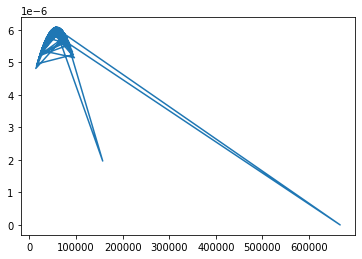

In [324]:
import matplotlib.pyplot as plt

x = sample
rv = stats.norm(loc = mean, scale = sample_std) 
y = rv.pdf(x)
plt.plot(x,y)

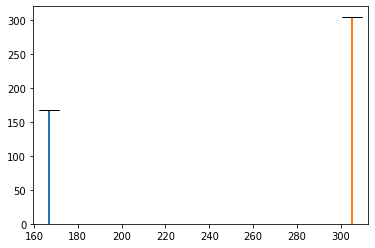

In [332]:
fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])


# 컬럼 별 평균 계산
col1_mean, col2_mean = np.mean(df['MntMeatProducts']), np.mean(df['MntWines'])


col1_confidence = confidence_interval(df['MntMeatProducts'])
col2_confidence = confidence_interval(df['MntWines'])

# plot 생성
plt.bar(x=col1_mean, height=col1_mean, yerr=col1_confidence[0]-col1_mean, capsize=10)
plt.bar(x=col2_mean, height=col2_mean, yerr=col2_confidence[0]-col2_mean, capsize=10)

# plot 보여주기
plt.show()